#### BDD100K Dataset - Exploratory Data Analysis (EDA)

##### Overview
comprehensive EDA on the BDD100K dataset using 10 sample JSON files from the training set. We will analyze:

1. **Attribute Distribution**: Weather, Scene, Time of Day classes and their frequencies
2. **Object Categories**: Different types of objects detected in the dataset
3. **Attribute Interactions**: Co-occurrence patterns between different attributes
4. **Object Size Distribution**: Size analysis for vehicles/persons vs. structural elements
5. **Category Analysis**: Complete list of all object categories


In [3]:

import json
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict, Counter
import warnings
warnings.filterwarnings('ignore')


sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

##### Step 1: Load and Parse Dataset

Load all JSON files from the training labels folder. The function automatically discovers and loads all `.json` files present in the specified directory.

In [4]:
def load_all_json_files(label_dir):
    """
    Load all JSON files from the specified directory.
    
    Args:
        label_dir: Path to the labels directory
    
    Returns:
        Dictionary with file names as keys and parsed JSON data as values
    """
    loaded_data = {}
    
    # Get all JSON files in the directory
    json_files = [f for f in os.listdir(label_dir) if f.endswith('.json')]
    
    print(f"Found {len(json_files)} JSON files in {label_dir}")
    
    for idx, filename in enumerate(json_files):
        filepath = os.path.join(label_dir, filename)
        try:
            with open(filepath, 'r') as f:
                loaded_data[filename.replace('.json', '')] = json.load(f)
        except Exception as e:
            print(f"Warning: Could not load {filename}: {e}")
        
        # Print progress every 1000 files
        if (idx + 1) % 1000 == 0:
            print(f"Loaded {idx + 1}/{len(json_files)} files...")
    
    print(f"\nSuccessfully loaded {len(loaded_data)} JSON files")
    return loaded_data

# Define the path to training labels
label_dir = r'd:\bdd100k\bdd100k_dataset\bdd100k_labels\train'

# Load all JSON files from the train folder
dataset = load_all_json_files(label_dir)
print(f"\nDataset contains {len(dataset)} files")

Found 70000 JSON files in d:\bdd100k\bdd100k_dataset\bdd100k_labels\train
Loaded 1000/70000 files...
Loaded 2000/70000 files...
Loaded 3000/70000 files...
Loaded 4000/70000 files...
Loaded 5000/70000 files...
Loaded 6000/70000 files...
Loaded 7000/70000 files...
Loaded 8000/70000 files...
Loaded 9000/70000 files...
Loaded 10000/70000 files...
Loaded 11000/70000 files...
Loaded 12000/70000 files...
Loaded 13000/70000 files...
Loaded 14000/70000 files...
Loaded 15000/70000 files...
Loaded 16000/70000 files...
Loaded 17000/70000 files...
Loaded 18000/70000 files...
Loaded 19000/70000 files...
Loaded 20000/70000 files...
Loaded 21000/70000 files...
Loaded 22000/70000 files...
Loaded 23000/70000 files...
Loaded 24000/70000 files...
Loaded 25000/70000 files...
Loaded 26000/70000 files...
Loaded 27000/70000 files...
Loaded 28000/70000 files...
Loaded 29000/70000 files...
Loaded 30000/70000 files...
Loaded 31000/70000 files...
Loaded 32000/70000 files...
Loaded 33000/70000 files...
Loaded 3400

##### Step 2: Parse and Extract 
Create a structured dataframe with all attributes and objects from the loaded JSON files. 

In [5]:
def extract_frame_attributes(dataset):
    """
    Extract frame-level attributes (weather, scene, timeofday) from all JSON files.
    
    Args:
        dataset: Dictionary containing loaded JSON data
    
    Returns:
        DataFrame with frame attributes
    """
    frame_data = []
    
    for filename, data in dataset.items():
        if 'attributes' in data:
            attrs = data['attributes']
            frame_data.append({
                'file_name': filename,
                'weather': attrs.get('weather', 'unknown'),
                'scene': attrs.get('scene', 'unknown'),
                'timeofday': attrs.get('timeofday', 'unknown')
            })
    
    df_frames = pd.DataFrame(frame_data)
    return df_frames

def extract_objects_information(dataset):
    """
    Extract all object information from frames, including category and box/poly dimensions.
    
    Args:
        dataset: Dictionary containing loaded JSON data
    
    Returns:
        DataFrame with object information
    """
    objects_data = []
    
    for filename, data in dataset.items():
        scene_attrs = data.get('attributes', {})
        
        for frame in data.get('frames', []):
            for obj in frame.get('objects', []):
                obj_info = {
                    'file_name': filename,
                    'weather': scene_attrs.get('weather', 'unknown'),
                    'scene': scene_attrs.get('scene', 'unknown'),
                    'timeofday': scene_attrs.get('timeofday', 'unknown'),
                    'object_id': obj.get('id'),
                    'category': obj.get('category', 'unknown'),
                    'occluded': obj.get('attributes', {}).get('occluded', False),
                    'truncated': obj.get('attributes', {}).get('truncated', False)
                }
                
                # Extract box2d information (for vehicles, persons, etc.)
                if 'box2d' in obj:
                    box2d = obj['box2d']
                    if box2d:  # Check if box2d is not empty
                        width = box2d.get('x2', 0) - box2d.get('x1', 0)
                        height = box2d.get('y2', 0) - box2d.get('y1', 0)
                        area = width * height
                        obj_info.update({
                            'has_box2d': True,
                            'box_width': width,
                            'box_height': height,
                            'box_area': area
                        })
                    else:
                        obj_info.update({
                            'has_box2d': False,
                            'box_width': 0,
                            'box_height': 0,
                            'box_area': 0
                        })
                else:
                    obj_info.update({
                        'has_box2d': False,
                        'box_width': 0,
                        'box_height': 0,
                        'box_area': 0
                    })
                
                objects_data.append(obj_info)
    
    df_objects = pd.DataFrame(objects_data)
    return df_objects

# Extract attributes
df_frames = extract_frame_attributes(dataset)
df_objects = extract_objects_information(dataset)

print("Frame Attributes DataFrame:")
print(f"Shape: {df_frames.shape}")
print(f"\n{df_frames.head()}")

print("\n" + "="*80)
print("Objects DataFrame:")
print(f"Shape: {df_objects.shape}")
print(f"\n{df_objects.head()}")

Frame Attributes DataFrame:
Shape: (69999, 4)

           file_name weather        scene  timeofday
0  0000f77c-6257be58   clear  city street    daytime
1  0000f77c-62c2a288   clear      highway  dawn/dusk
2  0000f77c-cb820c98   clear  residential  dawn/dusk
3  0001542f-5ce3cf52   clear  city street      night
4  0001542f-7c670be8   clear      highway      night

Objects DataFrame:
Shape: (1943204, 12)

           file_name weather        scene timeofday  object_id       category  \
0  0000f77c-6257be58   clear  city street   daytime          0  traffic light   
1  0000f77c-6257be58   clear  city street   daytime          1  traffic light   
2  0000f77c-6257be58   clear  city street   daytime          2   traffic sign   
3  0000f77c-6257be58   clear  city street   daytime          3   traffic sign   
4  0000f77c-6257be58   clear  city street   daytime          4            car   

   occluded  truncated  has_box2d   box_width  box_height      box_area  
0     False      False       Tru

##### Step 3: Attribute Distribution

Analyze the distribution of individual attributes (Weather, Scene, TimeOfDay) to understand the class balance in the dataset.

ATTRIBUTE DISTRIBUTION ANALYSIS

1. WEATHER Distribution:
----------------------------------------
   clear               : 37411 samples ( 53.4%)
   overcast            : 8784 samples ( 12.5%)
   undefined           : 8134 samples ( 11.6%)
   snowy               : 5571 samples (  8.0%)
   rainy               : 5083 samples (  7.3%)
   partly cloudy       : 4886 samples (  7.0%)
   foggy               : 130 samples (  0.2%)

2. SCENE Distribution:
----------------------------------------
   city street         : 43581 samples ( 62.3%)
   highway             : 17413 samples ( 24.9%)
   residential         : 8105 samples ( 11.6%)
   parking lot         : 378 samples (  0.5%)
   undefined           : 366 samples (  0.5%)
   tunnel              : 129 samples (  0.2%)
   gas stations        :  27 samples (  0.0%)

3. TIME OF DAY Distribution:
----------------------------------------
   daytime             : 36800 samples ( 52.6%)
   night               : 28027 samples ( 40.0%)
   dawn/dusk 

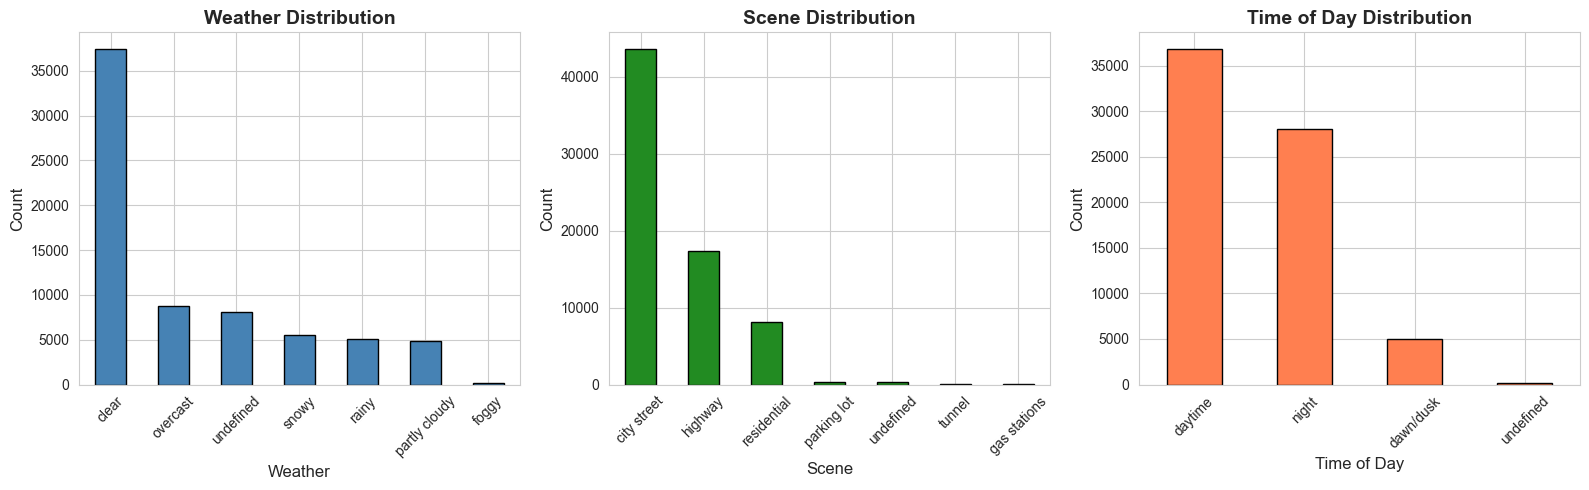

In [6]:
def analyze_attribute_distribution(df_frames):
    """
    Analyze the distribution of weather, scene, and timeofday attributes.
    
    Args:
        df_frames: DataFrame with frame attributes
    
    Returns:
        Dictionary with distribution counts for each attribute
    """
    distributions = {
        'weather': df_frames['weather'].value_counts().to_dict(),
        'scene': df_frames['scene'].value_counts().to_dict(),
        'timeofday': df_frames['timeofday'].value_counts().to_dict()
    }
    return distributions

def plot_attribute_distributions(df_frames):
    """
    Create visualizations for attribute distributions.
    """
    fig, axes = plt.subplots(1, 3, figsize=(16, 5))
    
    # Weather distribution
    df_frames['weather'].value_counts().plot(
        kind='bar', ax=axes[0], color='steelblue', edgecolor='black'
    )
    axes[0].set_title('Weather Distribution', fontsize=14, fontweight='bold')
    axes[0].set_ylabel('Count', fontsize=12)
    axes[0].set_xlabel('Weather', fontsize=12)
    axes[0].tick_params(axis='x', rotation=45)
    
    # Scene distribution
    df_frames['scene'].value_counts().plot(
        kind='bar', ax=axes[1], color='forestgreen', edgecolor='black'
    )
    axes[1].set_title('Scene Distribution', fontsize=14, fontweight='bold')
    axes[1].set_ylabel('Count', fontsize=12)
    axes[1].set_xlabel('Scene', fontsize=12)
    axes[1].tick_params(axis='x', rotation=45)
    
    # TimeOfDay distribution
    df_frames['timeofday'].value_counts().plot(
        kind='bar', ax=axes[2], color='coral', edgecolor='black'
    )
    axes[2].set_title('Time of Day Distribution', fontsize=14, fontweight='bold')
    axes[2].set_ylabel('Count', fontsize=12)
    axes[2].set_xlabel('Time of Day', fontsize=12)
    axes[2].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

# Perform analysis
attribute_distributions = analyze_attribute_distribution(df_frames)

print("="*80)
print("ATTRIBUTE DISTRIBUTION ANALYSIS")
print("="*80)

print("\n1. WEATHER Distribution:")
print("-" * 40)
for weather, count in sorted(attribute_distributions['weather'].items(), key=lambda x: x[1], reverse=True):
    percentage = (count / len(df_frames)) * 100
    print(f"   {weather:<20}: {count:>3} samples ({percentage:>5.1f}%)")

print("\n2. SCENE Distribution:")
print("-" * 40)
for scene, count in sorted(attribute_distributions['scene'].items(), key=lambda x: x[1], reverse=True):
    percentage = (count / len(df_frames)) * 100
    print(f"   {scene:<20}: {count:>3} samples ({percentage:>5.1f}%)")

print("\n3. TIME OF DAY Distribution:")
print("-" * 40)
for timeofday, count in sorted(attribute_distributions['timeofday'].items(), key=lambda x: x[1], reverse=True):
    percentage = (count / len(df_frames)) * 100
    print(f"   {timeofday:<20}: {count:>3} samples ({percentage:>5.1f}%)")

# Visualize distributions
plot_attribute_distributions(df_frames)

##### Step 4: Object Categories



OBJECT CATEGORY ANALYSIS

Total unique object categories: 21
Total objects detected: 1943204

--------------------------------------------------------------------------------
ALL OBJECT CATEGORIES (Sorted by Frequency):
--------------------------------------------------------------------------------
 1. car                           : 714121 ( 36.7%)
 2. lane/single white             : 247108 ( 12.7%)
 3. traffic sign                  : 239961 ( 12.3%)
 4. traffic light                 : 186301 (  9.6%)
 5. lane/road curb                : 109868 (  5.7%)
 6. lane/crosswalk                : 108284 (  5.6%)
 7. person                        : 91435 (  4.7%)
 8. area/drivable                 : 64050 (  3.3%)
 9. area/alternative              : 61799 (  3.2%)
10. lane/double yellow            : 37519 (  1.9%)
11. truck                         : 30012 (  1.5%)
12. lane/single yellow            : 20220 (  1.0%)
13. bus                           : 11688 (  0.6%)
14. bike                      

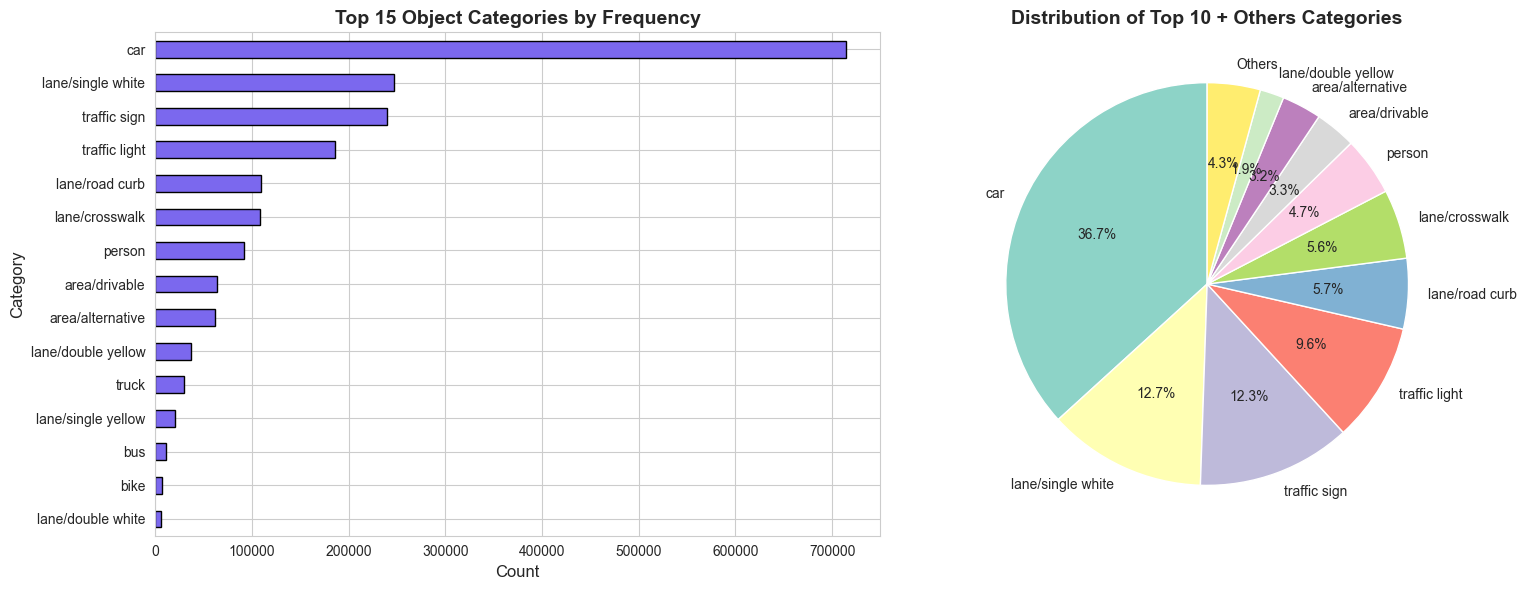

In [7]:
def categorize_objects(df_objects):
   
    vehicle_types = ['car', 'truck', 'bus', 'train', 'motorcycle']
    person_types = ['person', 'rider']
    traffic_types = ['traffic light', 'traffic sign']
    lane_types = ['lane/single white', 'lane/single yellow', 'lane/double white', 'lane/road curb']
    area_types = ['area/drivable', 'area/alternative']
    
    category_groups = {
        'vehicles': [],
        'persons': [],
        'traffic_elements': [],
        'lanes': [],
        'areas': [],
        'other': []
    }
    
    category_mapping = {
        'vehicles': vehicle_types,
        'persons': person_types,
        'traffic_elements': traffic_types,
        'lanes': lane_types,
        'areas': area_types
    }
    
    for idx, row in df_objects.iterrows():
        category = row['category'].lower()
        classified = False
        
        for group_name, category_list in category_mapping.items():
            if any(cat in category for cat in category_list):
                category_groups[group_name].append(category)
                classified = True
                break
        
        if not classified:
            category_groups['other'].append(category)
    
    return category_groups

def analyze_object_categories(df_objects):
    
    category_counts = df_objects['category'].value_counts().to_dict()
    return category_counts

def plot_object_categories(df_objects):
    
    category_counts = df_objects['category'].value_counts()
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Bar plot for top categories
    category_counts.head(15).plot(
        kind='barh', ax=ax1, color='mediumslateblue', edgecolor='black'
    )
    ax1.set_title('Top 15 Object Categories by Frequency', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Count', fontsize=12)
    ax1.set_ylabel('Category', fontsize=12)
    ax1.invert_yaxis()
    
    # Pie chart for category distribution (top 10)
    top_10 = category_counts.head(10)
    others_count = category_counts[10:].sum()
    if others_count > 0:
        top_10['Others'] = others_count
    
    colors = plt.cm.Set3(np.linspace(0, 1, len(top_10)))
    ax2.pie(top_10, labels=top_10.index, autopct='%1.1f%%', colors=colors, startangle=90)
    ax2.set_title('Distribution of Top 10 + Others Categories', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

# Analyze categories
category_counts = analyze_object_categories(df_objects)
category_groups = categorize_objects(df_objects)

print("="*80)
print("OBJECT CATEGORY ANALYSIS")
print("="*80)

print(f"\nTotal unique object categories: {len(category_counts)}")
print(f"Total objects detected: {len(df_objects)}")

print("\n" + "-"*80)
print("ALL OBJECT CATEGORIES (Sorted by Frequency):")
print("-"*80)
for idx, (category, count) in enumerate(sorted(category_counts.items(), key=lambda x: x[1], reverse=True), 1):
    percentage = (count / len(df_objects)) * 100
    print(f"{idx:>2}. {category:<30}: {count:>4} ({percentage:>5.1f}%)")

print("\n" + "-"*80)
print("OBJECT CATEGORIES BY GROUP:")
print("-"*80)
for group, categories in category_groups.items():
    unique_cats = set(categories)
    group_count = len(categories)
    print(f"\n{group.upper().replace('_', ' ')}:")
    print(f"  Total count: {group_count}")
    print(f"  Unique categories: {len(unique_cats)}")
    for cat in sorted(unique_cats):
        count = len([c for c in categories if c == cat])
        print(f"    - {cat:<30}: {count:>4}")

# Visualize categories
plot_object_categories(df_objects)

##### Step 5: Attribute Interactions

Analyze how different attributes interact with each other. For example, how many samples have specific combinations like (weather: clear, scene: highway, timeofday: daytime).

ATTRIBUTE INTERACTIONS ANALYSIS

Top 20 Attribute Combinations (Weather, Scene, TimeOfDay):
--------------------------------------------------------------------------------
Rank  Weather         Scene                Time of Day     Count   
--------------------------------------------------------------------------------
1     clear           city street          night           15090   
2     clear           city street          daytime         6647    
3     clear           highway              night           6167    
4     undefined       city street          daytime         5001    
5     overcast        city street          daytime         4411    
6     clear           highway              daytime         3582    
7     partly cloudy   city street          daytime         2225    
8     clear           residential          daytime         2134    
9     overcast        highway              daytime         1966    
10    snowy           city street          daytime         1908   

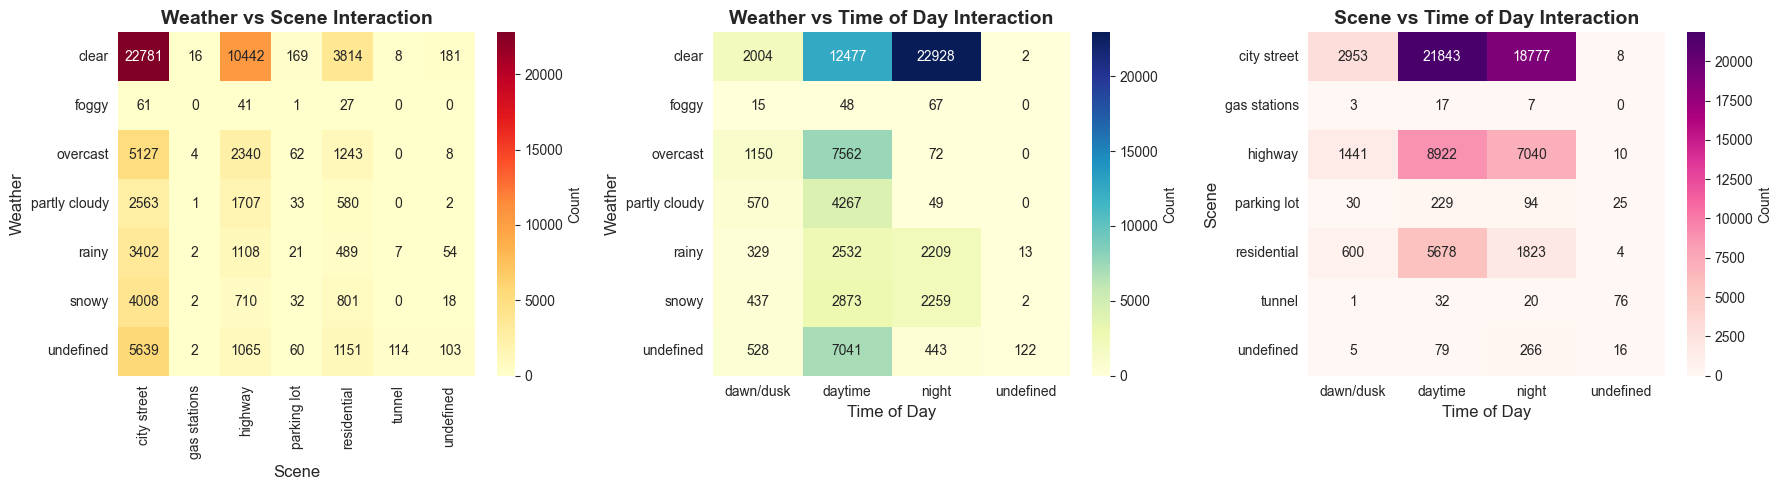


THREE-WAY INTERACTION VISUALIZATIONS


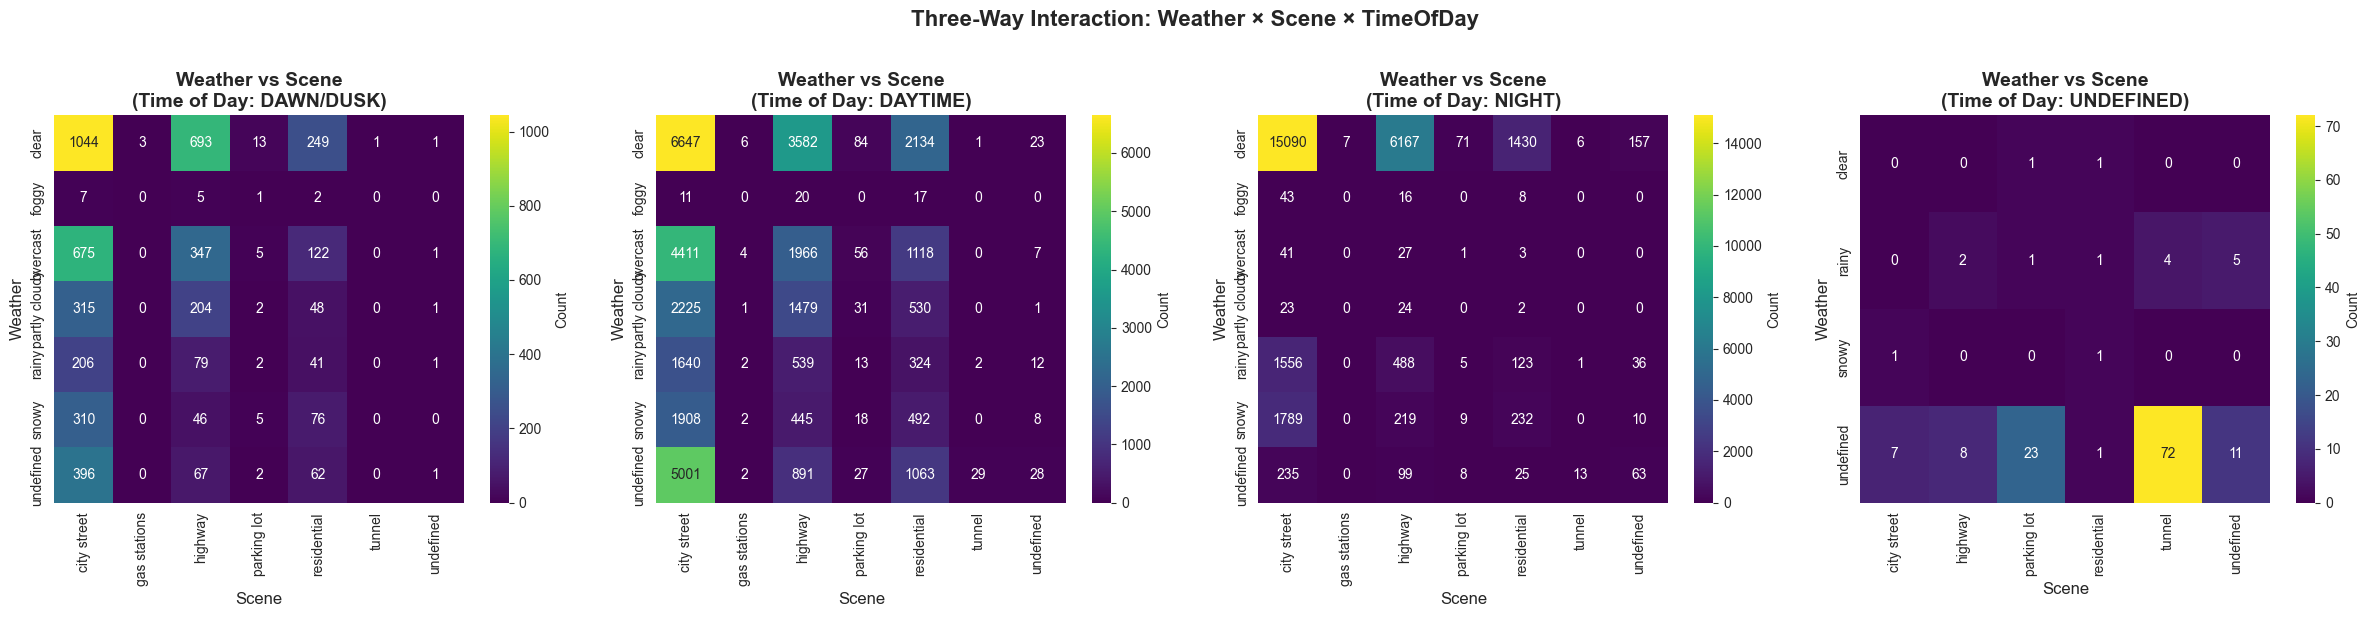

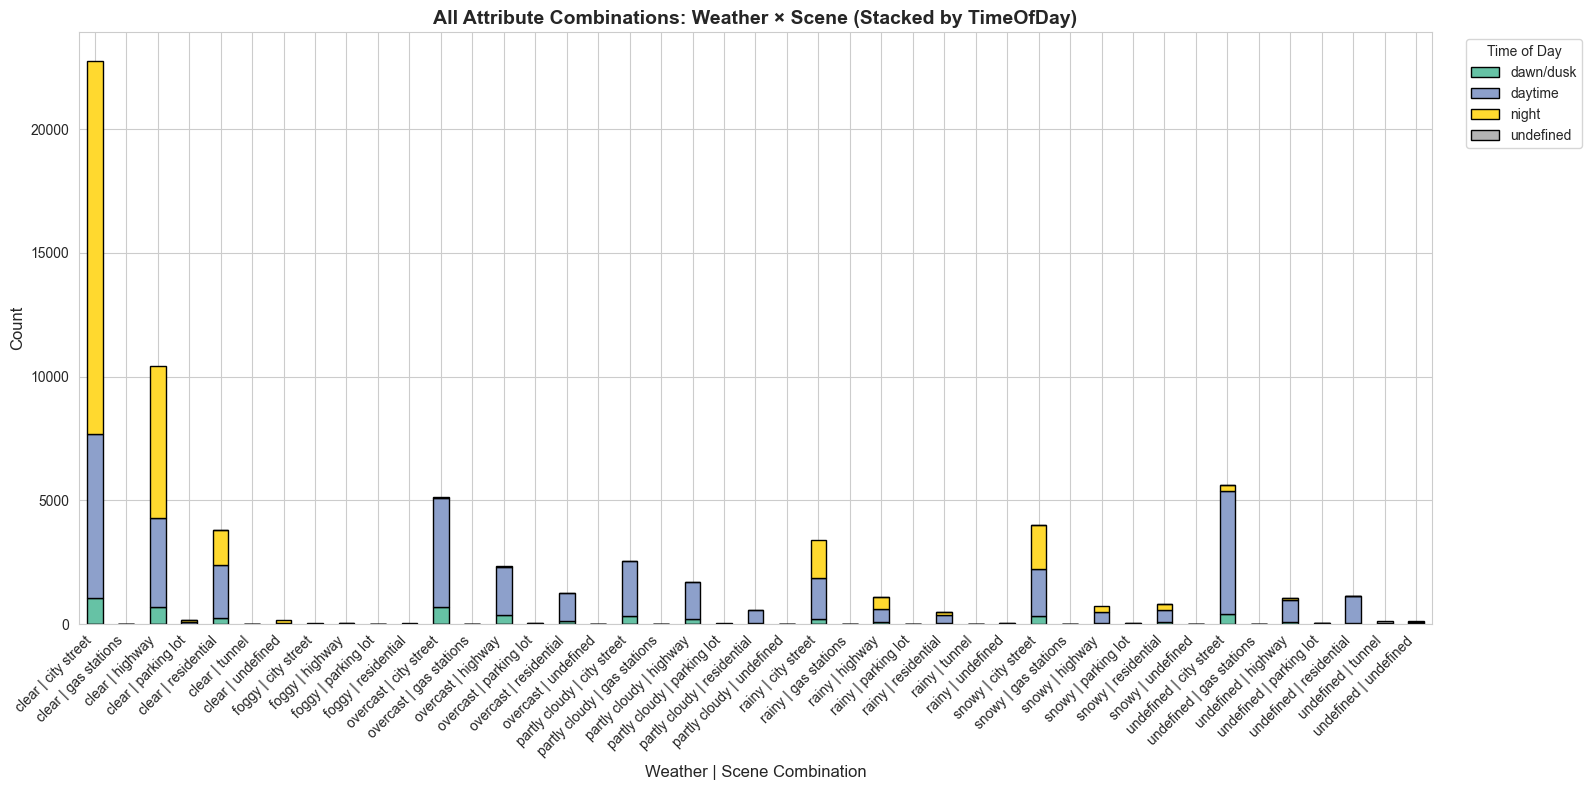

In [8]:
def analyze_attribute_interactions(df_frames):
    
    interactions = df_frames.groupby(['weather', 'scene', 'timeofday']).size().reset_index(name='count')
    interactions = interactions.sort_values('count', ascending=False)
    return interactions

def plot_pairwise_interactions(df_frames):
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    # Weather vs Scene
    weather_scene = pd.crosstab(df_frames['weather'], df_frames['scene'])
    sns.heatmap(weather_scene, annot=True, fmt='d', cmap='YlOrRd', ax=axes[0], cbar_kws={'label': 'Count'})
    axes[0].set_title('Weather vs Scene Interaction', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Scene', fontsize=12)
    axes[0].set_ylabel('Weather', fontsize=12)
    
    # Weather vs TimeOfDay
    weather_time = pd.crosstab(df_frames['weather'], df_frames['timeofday'])
    sns.heatmap(weather_time, annot=True, fmt='d', cmap='YlGnBu', ax=axes[1], cbar_kws={'label': 'Count'})
    axes[1].set_title('Weather vs Time of Day Interaction', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Time of Day', fontsize=12)
    axes[1].set_ylabel('Weather', fontsize=12)
    
    # Scene vs TimeOfDay
    scene_time = pd.crosstab(df_frames['scene'], df_frames['timeofday'])
    sns.heatmap(scene_time, annot=True, fmt='d', cmap='RdPu', ax=axes[2], cbar_kws={'label': 'Count'})
    axes[2].set_title('Scene vs Time of Day Interaction', fontsize=14, fontweight='bold')
    axes[2].set_xlabel('Time of Day', fontsize=12)
    axes[2].set_ylabel('Scene', fontsize=12)
    
    plt.tight_layout()
    plt.show()

def plot_three_way_interaction(df_frames):
    
    # Get unique values for each attribute
    time_values = df_frames['timeofday'].unique()
    n_times = len(time_values)
    
    # Create subplots - one heatmap per time of day showing Weather vs Scene
    fig, axes = plt.subplots(1, n_times, figsize=(6 * n_times, 6))
    
    if n_times == 1:
        axes = [axes]
    
    for idx, time_val in enumerate(sorted(time_values)):
        # Filter data for this time of day
        df_time = df_frames[df_frames['timeofday'] == time_val]
        
        # Create crosstab for Weather vs Scene at this time of day
        weather_scene_time = pd.crosstab(df_time['weather'], df_time['scene'])
        
        # Plot heatmap
        sns.heatmap(weather_scene_time, annot=True, fmt='d', cmap='viridis', 
                   ax=axes[idx], cbar_kws={'label': 'Count'})
        axes[idx].set_title(f'Weather vs Scene\n(Time of Day: {time_val.upper()})', 
                           fontsize=14, fontweight='bold')
        axes[idx].set_xlabel('Scene', fontsize=12)
        axes[idx].set_ylabel('Weather', fontsize=12)
    
    plt.suptitle('Three-Way Interaction: Weather × Scene × TimeOfDay', 
                fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()
    
    # Create a stacked bar chart showing all combinations
    fig, ax = plt.subplots(figsize=(16, 8))
    
    # Get interaction counts
    interactions = df_frames.groupby(['weather', 'scene', 'timeofday']).size().reset_index(name='count')
    interactions['combination'] = interactions['weather'] + ' | ' + interactions['scene']
    
    # Pivot for stacked bar chart
    pivot_df = interactions.pivot_table(index='combination', columns='timeofday', 
                                        values='count', fill_value=0)
    
    # Plot stacked bar chart
    pivot_df.plot(kind='bar', stacked=True, ax=ax, colormap='Set2', edgecolor='black')
    ax.set_title('All Attribute Combinations: Weather × Scene (Stacked by TimeOfDay)', 
                fontsize=14, fontweight='bold')
    ax.set_xlabel('Weather | Scene Combination', fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.legend(title='Time of Day', bbox_to_anchor=(1.02, 1), loc='upper left')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Analyze interactions
interactions = analyze_attribute_interactions(df_frames)

print("="*80)
print("ATTRIBUTE INTERACTIONS ANALYSIS")
print("="*80)

print("\nTop 20 Attribute Combinations (Weather, Scene, TimeOfDay):")
print("-"*80)
print(f"{'Rank':<5} {'Weather':<15} {'Scene':<20} {'Time of Day':<15} {'Count':<8}")
print("-"*80)

for idx, (_, row) in enumerate(interactions.head(20).iterrows(), 1):
    print(f"{idx:<5} {row['weather']:<15} {row['scene']:<20} {row['timeofday']:<15} {row['count']:<8}")

print("\n" + "-"*80)
print("Pairwise Interaction Matrices:")
print("-"*80)

# Weather vs Scene
print("\n1. WEATHER vs SCENE:")
weather_scene = pd.crosstab(df_frames['weather'], df_frames['scene'])
print(weather_scene)

# Weather vs TimeOfDay
print("\n2. WEATHER vs TIME OF DAY:")
weather_time = pd.crosstab(df_frames['weather'], df_frames['timeofday'])
print(weather_time)

# Scene vs TimeOfDay
print("\n3. SCENE vs TIME OF DAY:")
scene_time = pd.crosstab(df_frames['scene'], df_frames['timeofday'])
print(scene_time)

# Three-way interaction table
print("\n" + "-"*80)
print("4. THREE-WAY INTERACTION (Weather × Scene × TimeOfDay):")
print("-"*80)
print("\nComplete Combination Counts:")
three_way = df_frames.groupby(['weather', 'scene', 'timeofday']).size().unstack(fill_value=0)
print(three_way)

print("\n" + "-"*80)
print("Summary Statistics for Three-Way Interactions:")
print("-"*80)
print(f"Total unique combinations: {len(interactions)}")
print(f"Most common combination: {interactions.iloc[0]['weather']} | {interactions.iloc[0]['scene']} | {interactions.iloc[0]['timeofday']} ({interactions.iloc[0]['count']} samples)")
if len(interactions) > 1:
    print(f"Least common combination: {interactions.iloc[-1]['weather']} | {interactions.iloc[-1]['scene']} | {interactions.iloc[-1]['timeofday']} ({interactions.iloc[-1]['count']} samples)")
print(f"Average samples per combination: {interactions['count'].mean():.2f}")
print(f"Median samples per combination: {interactions['count'].median():.2f}")

print("\n" + "-"*80)
print("SPECIFIC ATTRIBUTE COUNTS:")
print("-"*80)
clear_weather_count = df_frames[df_frames['weather'] == 'clear'].shape[0]
print(f"Total frames with 'clear' weather: {clear_weather_count}")
print(f"Percentage of dataset: {(clear_weather_count / len(df_frames) * 100):.1f}%")

# Visualize pairwise interactions
plot_pairwise_interactions(df_frames)

# Visualize three-way interactions
print("\n" + "="*80)
print("THREE-WAY INTERACTION VISUALIZATIONS")
print("="*80)
plot_three_way_interaction(df_frames)

##### Step 6: - Object Size Distribution

Compare size distributions between movable objects (vehicles, persons) and static elements (lanes, areas, traffic lights). This analysis helps understand the scale of objects in different contexts.

OBJECT SIZE DISTRIBUTION ANALYSIS

Total objects with bounding boxes: 1288010 out of 1943204
Objects without bounding boxes (poly2d): 655194

--------------------------------------------------------------------------------
Size Statistics by Object Type:
--------------------------------------------------------------------------------

OTHER:
  Count: 10227
  Average Area: 6419.02 pixels²
  Median Area: 2472.72 pixels²
  Area Range: [3.75, 316440.64] pixels²
  Std Dev Area: 12643.57
  Average Width: 62.57 pixels
  Average Height: 67.71 pixels

PERSON:
  Count: 95926
  Average Area: 3108.86 pixels²
  Median Area: 1096.35 pixels²
  Area Range: [2.40, 344937.76] pixels²
  Std Dev Area: 8100.35
  Average Width: 28.43 pixels
  Average Height: 67.49 pixels

TRAFFIC_LIGHT:
  Count: 186224
  Average Area: 507.44 pixels²
  Median Area: 263.11 pixels²
  Area Range: [0.94, 302654.31] pixels²
  Std Dev Area: 1697.79
  Average Width: 15.87 pixels
  Average Height: 25.29 pixels

TRAFFIC_SIGN:
  Count

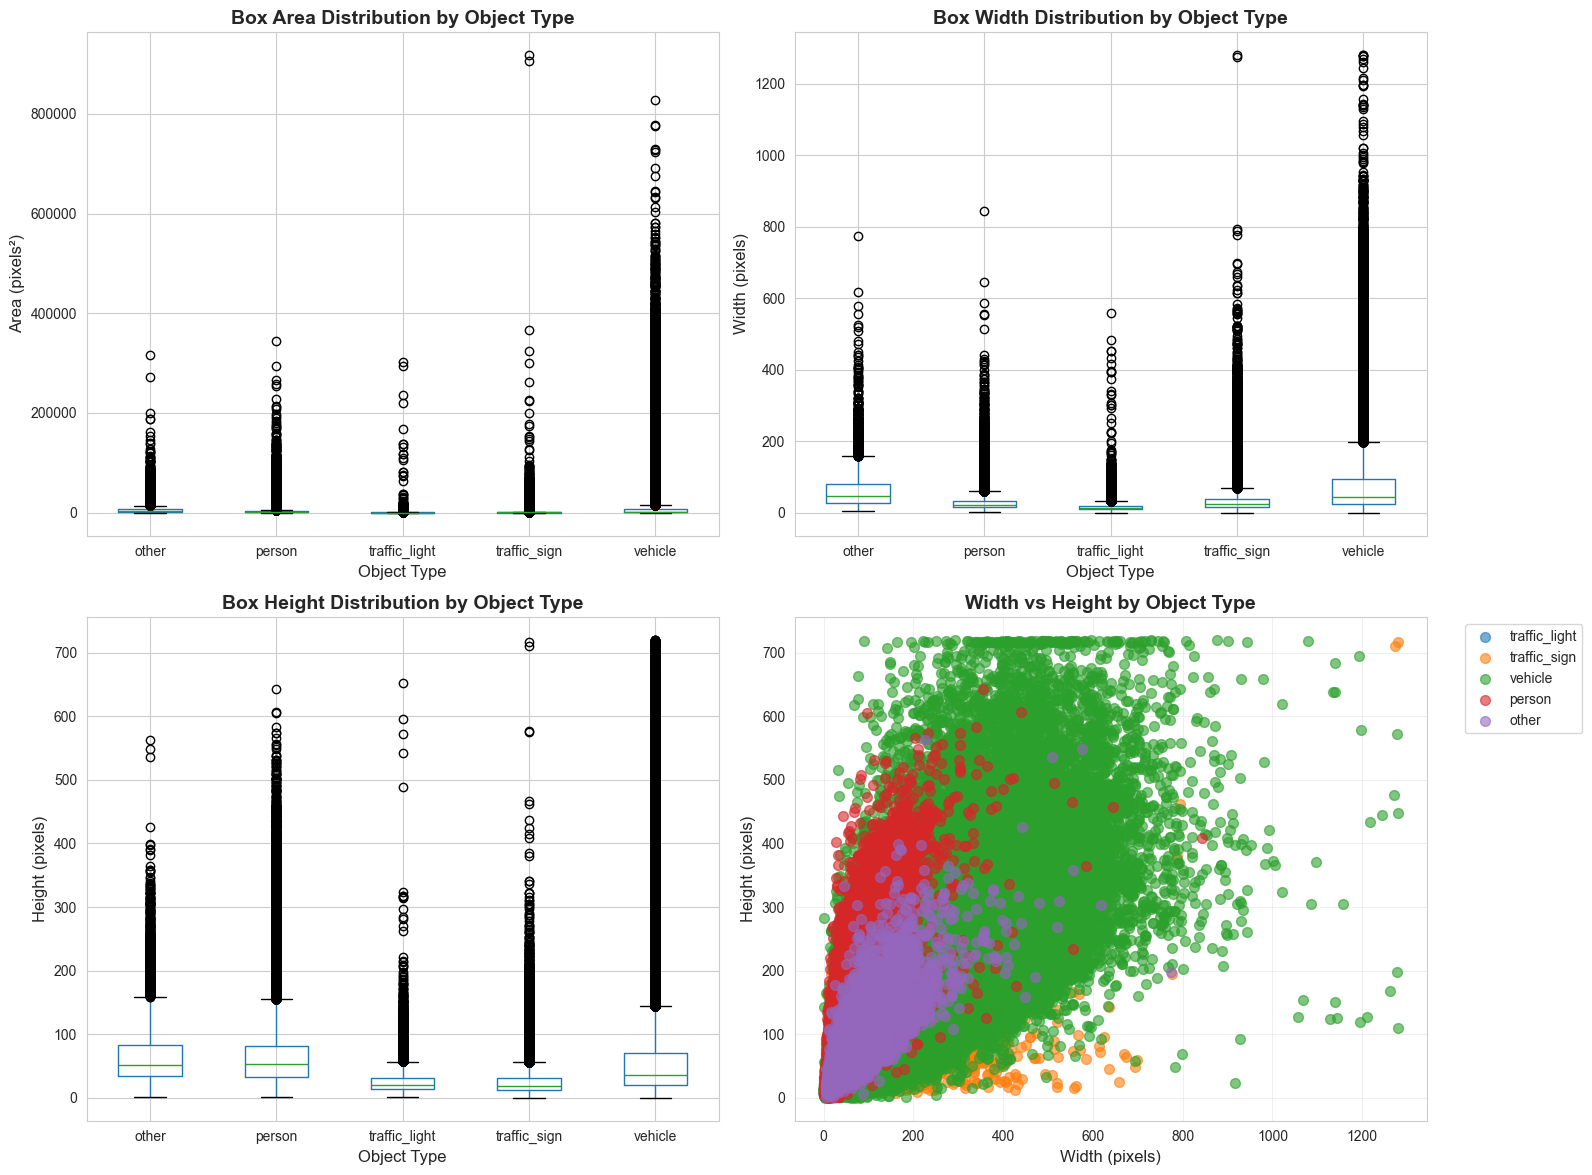

In [9]:
def classify_object_types(df_objects):
    
    def get_object_type(category):
        category_lower = category.lower()
        
        if any(x in category_lower for x in ['car', 'truck', 'bus', 'train', 'motorcycle', 'vehicle']):
            return 'vehicle'
        elif any(x in category_lower for x in ['person', 'rider', 'pedestrian']):
            return 'person'
        elif any(x in category_lower for x in ['traffic light']):
            return 'traffic_light'
        elif any(x in category_lower for x in ['traffic sign']):
            return 'traffic_sign'
        elif any(x in category_lower for x in ['lane']):
            return 'lane'
        elif any(x in category_lower for x in ['area']):
            return 'area'
        else:
            return 'other'
    
    df_objects['object_type'] = df_objects['category'].apply(get_object_type)
    return df_objects

def analyze_size_distribution(df_objects):
    # Filter objects with box2d information (area > 0)
    df_with_box = df_objects[df_objects['box_area'] > 0].copy()
    
    if len(df_with_box) == 0:
        print("No objects with box2d coordinates found!")
        return {}
    
    size_stats = {}
    for obj_type in df_with_box['object_type'].unique():
        type_data = df_with_box[df_with_box['object_type'] == obj_type]
        size_stats[obj_type] = {
            'count': len(type_data),
            'avg_area': type_data['box_area'].mean(),
            'median_area': type_data['box_area'].median(),
            'min_area': type_data['box_area'].min(),
            'max_area': type_data['box_area'].max(),
            'std_area': type_data['box_area'].std(),
            'avg_width': type_data['box_width'].mean(),
            'avg_height': type_data['box_height'].mean()
        }
    
    return size_stats, df_with_box

def plot_size_distributions(df_with_box):
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Box area distribution by object type
    df_with_box.boxplot(column='box_area', by='object_type', ax=axes[0, 0])
    axes[0, 0].set_title('Box Area Distribution by Object Type', fontsize=14, fontweight='bold')
    axes[0, 0].set_xlabel('Object Type', fontsize=12)
    axes[0, 0].set_ylabel('Area (pixels²)', fontsize=12)
    axes[0, 0].get_figure().suptitle('')  # Remove default title
    
    # Box width distribution by object type
    df_with_box.boxplot(column='box_width', by='object_type', ax=axes[0, 1])
    axes[0, 1].set_title('Box Width Distribution by Object Type', fontsize=14, fontweight='bold')
    axes[0, 1].set_xlabel('Object Type', fontsize=12)
    axes[0, 1].set_ylabel('Width (pixels)', fontsize=12)
    axes[0, 1].get_figure().suptitle('')
    
    # Box height distribution by object type
    df_with_box.boxplot(column='box_height', by='object_type', ax=axes[1, 0])
    axes[1, 0].set_title('Box Height Distribution by Object Type', fontsize=14, fontweight='bold')
    axes[1, 0].set_xlabel('Object Type', fontsize=12)
    axes[1, 0].set_ylabel('Height (pixels)', fontsize=12)
    axes[1, 0].get_figure().suptitle('')
    
    # Scatter plot: Width vs Height colored by object type
    for obj_type in df_with_box['object_type'].unique():
        type_data = df_with_box[df_with_box['object_type'] == obj_type]
        axes[1, 1].scatter(type_data['box_width'], type_data['box_height'], 
                          label=obj_type, alpha=0.6, s=50)
    
    axes[1, 1].set_title('Width vs Height by Object Type', fontsize=14, fontweight='bold')
    axes[1, 1].set_xlabel('Width (pixels)', fontsize=12)
    axes[1, 1].set_ylabel('Height (pixels)', fontsize=12)
    axes[1, 1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Classify objects
df_objects = classify_object_types(df_objects)

# Analyze sizes
size_stats, df_with_box = analyze_size_distribution(df_objects)

print("="*80)
print("OBJECT SIZE DISTRIBUTION ANALYSIS")
print("="*80)

print(f"\nTotal objects with bounding boxes: {len(df_with_box)} out of {len(df_objects)}")
print(f"Objects without bounding boxes (poly2d): {len(df_objects) - len(df_with_box)}")

print("\n" + "-"*80)
print("Size Statistics by Object Type:")
print("-"*80)

for obj_type in sorted(size_stats.keys()):
    stats = size_stats[obj_type]
    print(f"\n{obj_type.upper()}:")
    print(f"  Count: {stats['count']}")
    print(f"  Average Area: {stats['avg_area']:.2f} pixels²")
    print(f"  Median Area: {stats['median_area']:.2f} pixels²")
    print(f"  Area Range: [{stats['min_area']:.2f}, {stats['max_area']:.2f}] pixels²")
    print(f"  Std Dev Area: {stats['std_area']:.2f}")
    print(f"  Average Width: {stats['avg_width']:.2f} pixels")
    print(f"  Average Height: {stats['avg_height']:.2f} pixels")

# Visualize size distributions
plot_size_distributions(df_with_box)

##### Step 7: Category Summary and Statistics



In [10]:
def generate_category_context_analysis(df_objects):
    
    category_context = {}
    
    for category in df_objects['category'].unique():
        cat_data = df_objects[df_objects['category'] == category]
        
        category_context[category] = {
            'total_count': len(cat_data),
            'weather_contexts': cat_data['weather'].value_counts().to_dict(),
            'scene_contexts': cat_data['scene'].value_counts().to_dict(),
            'timeofday_contexts': cat_data['timeofday'].value_counts().to_dict(),
            'avg_occluded_ratio': (cat_data['occluded'].sum() / len(cat_data)) * 100 if len(cat_data) > 0 else 0,
            'avg_truncated_ratio': (cat_data['truncated'].sum() / len(cat_data)) * 100 if len(cat_data) > 0 else 0,
            'object_type': cat_data['object_type'].iloc[0] if len(cat_data) > 0 else 'unknown'
        }
    
    return category_context

def print_category_context_summary(category_context):
    
    print("="*80)
    print("DETAILED CATEGORY CONTEXT ANALYSIS")
    print("="*80)
    
    # Sort by total count
    sorted_cats = sorted(category_context.items(), key=lambda x: x[1]['total_count'], reverse=True)
    
    for idx, (category, context) in enumerate(sorted_cats, 1):
        print(f"\n{idx}. CATEGORY: {category.upper()}")
        print(f"   Type: {context['object_type']}")
        print(f"   Total Count: {context['total_count']}")
        print(f"   Occluded Ratio: {context['avg_occluded_ratio']:.1f}%")
        print(f"   Truncated Ratio: {context['avg_truncated_ratio']:.1f}%")
        
        print(f"\n   Weather Contexts:")
        for weather, count in sorted(context['weather_contexts'].items(), key=lambda x: x[1], reverse=True):
            pct = (count / context['total_count']) * 100
            print(f"      - {weather:<20}: {count:>3} ({pct:>5.1f}%)")
        
        print(f"\n   Scene Contexts:")
        for scene, count in sorted(context['scene_contexts'].items(), key=lambda x: x[1], reverse=True):
            pct = (count / context['total_count']) * 100
            print(f"      - {scene:<20}: {count:>3} ({pct:>5.1f}%)")
        
        print(f"\n   Time of Day Contexts:")
        for timeofday, count in sorted(context['timeofday_contexts'].items(), key=lambda x: x[1], reverse=True):
            pct = (count / context['total_count']) * 100
            print(f"      - {timeofday:<20}: {count:>3} ({pct:>5.1f}%)")
        
        print("-" * 80)

def create_category_summary_table(df_objects):
    
    summary_data = []
    
    for category in sorted(df_objects['category'].unique()):
        cat_data = df_objects[df_objects['category'] == category]
        
        summary_data.append({
            'Category': category,
            'Count': len(cat_data),
            'Object Type': cat_data['object_type'].iloc[0],
            'Avg Occluded %': f"{(cat_data['occluded'].sum() / len(cat_data) * 100):.1f}%",
            'Avg Truncated %': f"{(cat_data['truncated'].sum() / len(cat_data) * 100):.1f}%",
            'Has Box2D': f"{(cat_data['has_box2d'].sum() / len(cat_data) * 100):.1f}%"
        })
    
    df_summary = pd.DataFrame(summary_data)
    return df_summary

# Generate category context analysis
category_context = generate_category_context_analysis(df_objects)

# Print summary
print_category_context_summary(category_context)

# Create summary table
df_category_summary = create_category_summary_table(df_objects)

print("\n" + "="*80)
print("CATEGORY SUMMARY TABLE")
print("="*80)
print(df_category_summary.to_string(index=False))

DETAILED CATEGORY CONTEXT ANALYSIS

1. CATEGORY: CAR
   Type: vehicle
   Total Count: 714121
   Occluded Ratio: 67.7%
   Truncated Ratio: 9.3%

   Weather Contexts:
      - clear               : 373147 ( 52.3%)
      - overcast            : 103930 ( 14.6%)
      - undefined           : 80064 ( 11.2%)
      - partly cloudy       : 55759 (  7.8%)
      - snowy               : 52257 (  7.3%)
      - rainy               : 47766 (  6.7%)
      - foggy               : 1174 (  0.2%)
      - unknown             :  24 (  0.0%)

   Scene Contexts:
      - city street         : 448961 ( 62.9%)
      - highway             : 158852 ( 22.2%)
      - residential         : 98336 ( 13.8%)
      - parking lot         : 4600 (  0.6%)
      - undefined           : 2475 (  0.3%)
      - tunnel              : 684 (  0.1%)
      - gas stations        : 189 (  0.0%)
      - unknown             :  24 (  0.0%)

   Time of Day Contexts:
      - daytime             : 401754 ( 56.3%)
      - night               : 

## Step 8: Summary and Key Findings

Compile all findings from the EDA analysis and prepare recommendations for dataset preparation for YOLOv11.

In [11]:
def generate_eda_summary_report():
    
    print("\n" + "="*80)
    print("COMPREHENSIVE EDA SUMMARY REPORT")
    print("="*80)
    
    print("\n1. DATASET OVERVIEW")
    print("-" * 80)
    print(f"   Total frames analyzed: {len(df_frames)}")
    print(f"   Total objects detected: {len(df_objects)}")
    print(f"   Average objects per frame: {len(df_objects) / len(df_frames):.2f}")
    print(f"   Unique object categories: {df_objects['category'].nunique()}")
    
    print("\n2. ATTRIBUTE DISTRIBUTION INSIGHTS")
    print("-" * 80)
    print(f"   Weather Classes: {df_frames['weather'].nunique()} distinct values")
    print(f"      Most common: {df_frames['weather'].value_counts().index[0]} ({df_frames['weather'].value_counts().values[0]} samples)")
    print(f"\n   Scene Classes: {df_frames['scene'].nunique()} distinct values")
    print(f"      Most common: {df_frames['scene'].value_counts().index[0]} ({df_frames['scene'].value_counts().values[0]} samples)")
    print(f"\n   Time of Day Classes: {df_frames['timeofday'].nunique()} distinct values")
    print(f"      Most common: {df_frames['timeofday'].value_counts().index[0]} ({df_frames['timeofday'].value_counts().values[0]} samples)")
    
    print("\n3. OBJECT CATEGORY DISTRIBUTION")
    print("-" * 80)
    top_5_cats = df_objects['category'].value_counts().head(5)
    for idx, (cat, count) in enumerate(top_5_cats.items(), 1):
        pct = (count / len(df_objects)) * 100
        print(f"   {idx}. {cat:<30}: {count:>4} ({pct:>5.1f}%)")
    
    print("\n4. OBJECT TYPE BREAKDOWN")
    print("-" * 80)
    obj_type_dist = df_objects['object_type'].value_counts()
    for obj_type, count in obj_type_dist.items():
        pct = (count / len(df_objects)) * 100
        print(f"   {obj_type:<20}: {count:>4} ({pct:>5.1f}%)")
    
    print("\n5. ATTRIBUTE QUALITY METRICS")
    print("-" * 80)
    occlusion_rate = (df_objects['occluded'].sum() / len(df_objects)) * 100
    truncation_rate = (df_objects['truncated'].sum() / len(df_objects)) * 100
    box2d_coverage = (df_objects['has_box2d'].sum() / len(df_objects)) * 100
    
    print(f"   Occlusion Rate: {occlusion_rate:.1f}%")
    print(f"   Truncation Rate: {truncation_rate:.1f}%")
    print(f"   Box2D Coverage: {box2d_coverage:.1f}%")
    print(f"   Poly2D Coverage: {100 - box2d_coverage:.1f}%")
    
    print("\n6. SIZE DISTRIBUTION INSIGHTS")
    print("-" * 80)
    if len(df_with_box) > 0:
        print(f"   Objects with bounding boxes: {len(df_with_box)}")
        print(f"   Median object area: {df_with_box['box_area'].median():.2f} pixels²")
        print(f"   Mean object area: {df_with_box['box_area'].mean():.2f} pixels²")
        print(f"   Area range: [{df_with_box['box_area'].min():.0f}, {df_with_box['box_area'].max():.0f}] pixels²")
    
    print("\n7. KEY STATISTICS FOR MODEL TRAINING")
    print("-" * 80)
    print(f"   Class balance (top 3 classes): {(df_objects['category'].value_counts().head(3).sum() / len(df_objects) * 100):.1f}% of data")
    print(f"   Long-tail classes (count < 5): {(df_objects['category'].value_counts() < 5).sum()} categories")
    print(f"   Imbalanced attributes: {'Yes' if df_frames['weather'].value_counts().max() / len(df_frames) > 0.6 else 'No'}")
    
    print("\n" + "="*80)

# Generate and print the summary report
generate_eda_summary_report()




COMPREHENSIVE EDA SUMMARY REPORT

1. DATASET OVERVIEW
--------------------------------------------------------------------------------
   Total frames analyzed: 69999
   Total objects detected: 1943204
   Average objects per frame: 27.76
   Unique object categories: 21

2. ATTRIBUTE DISTRIBUTION INSIGHTS
--------------------------------------------------------------------------------
   Weather Classes: 7 distinct values
      Most common: clear (37411 samples)

   Scene Classes: 7 distinct values
      Most common: city street (43581 samples)

   Time of Day Classes: 4 distinct values
      Most common: daytime (36800 samples)

3. OBJECT CATEGORY DISTRIBUTION
--------------------------------------------------------------------------------
   1. car                           : 714121 ( 36.7%)
   2. lane/single white             : 247108 ( 12.7%)
   3. traffic sign                  : 239961 ( 12.3%)
   4. traffic light                 : 186301 (  9.6%)
   5. lane/road curb             